In [45]:
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt

import events_utils.time_difference as td

In [46]:
events = np.loadtxt("events_synt.txt")

In [47]:
time_diff = td.compute_time_difference(events, (180, 180), dist=-1, polarity=1)

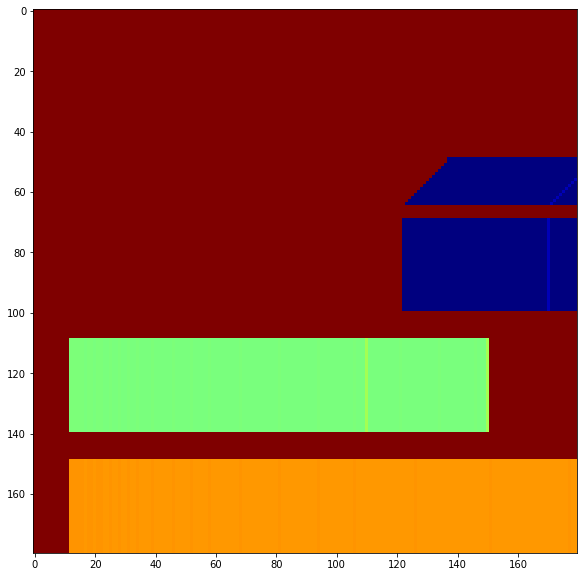

In [48]:
plt.figure(figsize=(10, 10))
plt.imshow(time_diff, cmap="jet_r")

In [49]:
warped_dict = td.compute_time_difference_warped(events, (180, 180), 0.0, (180, 180), dist=-1, polarity=1)
warped_img = td.median_from_dict(warped_dict, (180, 180))

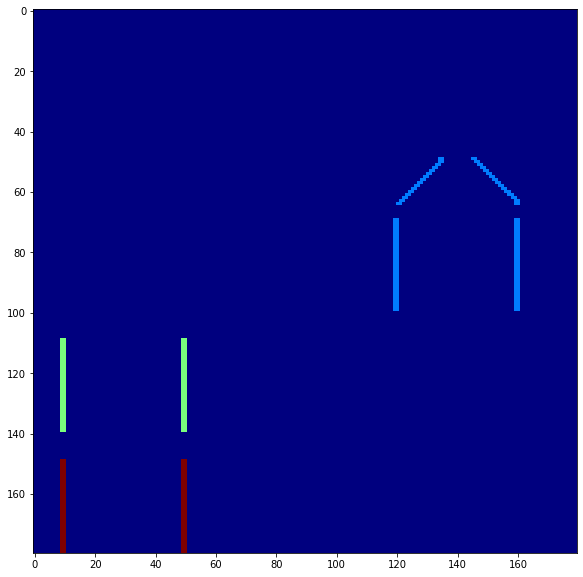

In [50]:
plt.figure(figsize=(10, 10))
plt.imshow(warped_img, cmap="jet_r")